<a id='top'></a>
# Project: GDP/capita Investigation 
## Data: obtained from GapMinder.org/data - GDP per capita US inflation adjusted for 2010. Additional data includes Gini coefficient, & Corruption perception index.
### Data Descriptions:
1. GDP per capita is gross domestic product divided by midyear population. GDP is the sum of gross value added by all resident **producers** in the economy. 
1. Gini shows income inequality in a society. A higher number means more inequality. 
1. CPI (Corruption Perception Index) is transparency international's score of perceptions of corruption. Higher values indicate LESS corruption) 

# Questions:

1.  How does the world's countries GDP/capita compare with one another?

After calculating the **Compound Annual Growth Rate (CAGR)** for all country's GDP/capita from 2000-2018, determine characteristics such as:

2. Which regions, as determined by the World Bank, contain the top 10 fastest growing countries?
3. Which income groups are represented, as determined by the World Bank, by the top 10 fastest growing countries (highest CAGR values)?
4. What did the GDP/capita trend look like for the top 10 countries?
## See Society Data notebook
1. How did perceived corruption change, if any, during expansive growth?
2. How did the Gini coefficient change, if any, during expansive growth?


## Table of Contents

<ul>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul>
        <li><a href="#question_1">Question 1</a></li>
        <li><a href="#question_2">Question 2</a></li>
        <li><a href="#question_3">Question 3</a></li>
        <li><a href="#question_4">Question 4</a></li>
    </ul>
    <li><a href="#conclusions">Conclusions</a></li>
</ul>

## Environment & Datasets Setup 

Utilizing an economic growth dataset, **GDP/capita (US$ inflation adjusted)** from gapminder.com/data

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_style('darkgrid')

#mpl.style.use('ggplot')
%matplotlib inline

### Remove scientific notation
#pd.set_option('display.float_format', lambda x: '%1.0f' % x)

### Read Total GDP by PPP adjusted for inflation
gdp = pd.read_csv("data_income/gdppercapita_us_inflation_adjusted.csv")
gdp.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,488.0,543,529.0,576.0,588.0,584.0,574.0,571.0,572.0,564.0
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3930.0,4090,4210.0,4280.0,4330.0,4410.0,4520.0,4680.0,4870.0,5080.0
2,Algeria,2480.0,2090.0,1640.0,2150.0,2210.0,2290.0,2120.0,2260.0,2430.0,...,4400.0,4480,4520.0,4590.0,4620.0,4700.0,4780.0,4830.0,4790.0,4760.0
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42000.0,39700,38200.0,38200.0,39100.0,40800.0,41800.0,42900.0,43900.0,44600.0
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3550.0,3590,3580.0,3750.0,3800.0,3840.0,3750.0,3530.0,3410.0,3230.0


<a id='wrangling'></a>
# Data Wrangling
## Load country dataset which provides World Bank regions & income groups

<a href="#top">Back to top</a>

In [3]:
# get countries dataframe to have ability to divide world into regions or income groups
# drop columns not needed, & rename for merge and ease of use

country_df = pd.read_csv("country_regions.csv")
country_df.rename(columns={'name':'country', 'World bank, 4 income groups 2017':'2017 income groups'}, inplace=True)
country_df.drop(['geo','World bank, 3 income groups 2017','members_oecd_g77','Latitude','Longitude','UN member since'],axis=1,inplace=True)
country_df.head()

,country,four_regions,eight_regions,six_regions,World bank region,2017 income groups
0,Afghanistan,asia,asia_west,south_asia,South Asia,Low income
1,Albania,europe,europe_east,europe_central_asia,Europe & Central Asia,Upper middle income
2,Algeria,africa,africa_north,middle_east_north_africa,Middle East & North Africa,Upper middle income
3,Andorra,europe,europe_west,europe_central_asia,Europe & Central Asia,High income
4,Angola,africa,africa_sub_saharan,sub_saharan_africa,Sub-Saharan Africa,Lower middle income


In [4]:
# Merge the GDP/capita & country dataset into ONE dataset

gdp20up = pd.merge(gdp, country_df, on='country')
gdp20up.head(1)

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2014,2015,2016,2017,2018,four_regions,eight_regions,six_regions,World bank region,2017 income groups
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,584.0,574.0,571.0,572.0,564.0,asia,asia_west,south_asia,South Asia,Low income


In [5]:
# merge GDP/capita & country datasets

gdp2 = pd.merge(gdp, country_df, on="country")
gdp2.head(3)

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2014,2015,2016,2017,2018,four_regions,eight_regions,six_regions,World bank region,2017 income groups
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,584.0,574.0,571.0,572.0,564.0,asia,asia_west,south_asia,South Asia,Low income
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4410.0,4520.0,4680.0,4870.0,5080.0,europe,europe_east,europe_central_asia,Europe & Central Asia,Upper middle income
2,Algeria,2480.0,2090.0,1640.0,2150.0,2210.0,2290.0,2120.0,2260.0,2430.0,...,4700.0,4780.0,4830.0,4790.0,4760.0,africa,africa_north,middle_east_north_africa,Middle East & North Africa,Upper middle income


# Missing Data
## Determine year range and evaluate missing data according to that range

<a href="#top">Back to top</a>

In [6]:
gdp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 189
Data columns (total 65 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             190 non-null    object 
 1   1960                90 non-null     float64
 2   1961                91 non-null     float64
 3   1962                91 non-null     float64
 4   1963                91 non-null     float64
 5   1964                91 non-null     float64
 6   1965                95 non-null     float64
 7   1966                98 non-null     float64
 8   1967                99 non-null     float64
 9   1968                101 non-null    float64
 10  1969                101 non-null    float64
 11  1970                112 non-null    float64
 12  1971                112 non-null    float64
 13  1972                112 non-null    float64
 14  1973                112 non-null    float64
 15  1974                114 non-null    float64
 16  1975    

## Too many missing values from 1960 - 1999. Will utilize years 2000-2018 for data analysis

In [7]:
# Create list of years that will be dropped from the dataset, years 1960-1999. These years have too many missing values.

years_drop20 = [str(x) for x in range(1960,2000,1)]

In [8]:
# drop years & verify
gdp20up.drop(years_drop20, axis=1, inplace=True)
gdp20up.head(1)

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,four_regions,eight_regions,six_regions,World bank region,2017 income groups
0,Afghanistan,NaN,NaN,330.0,343.0,333.0,357.0,365.0,406.0,412.0,...,584.0,574.0,571.0,572.0,564.0,asia,asia_west,south_asia,South Asia,Low income


## How many missing values per row/country, from 2000 - 2018?
I'm certain there's a much easier way to do this. However, I have resorted to creating a series of missing values by index. Added country's names back, and filtered out the values greater than 0.

In [9]:
missing_vals20 = gdp20up.isnull().sum(axis=1)
missing_vals20

0      2
1      0
2      0
3      0
4      0
      ..
185    4
186    0
187    0
188    0
189    0
Length: 190, dtype: int64

In [10]:
# create series of countries name to add back to missing_values
countries_list20 = gdp20up.iloc[:,0]

In [11]:
# create dictionary of countries & missing values, create dataframe, filter out 0 missing values, & sort greatest to least
frame20 = {'country': countries_list20, 'missing values': missing_vals20}
country_nulls20 = pd.DataFrame(frame20)
country_nulls20 = country_nulls20[country_nulls20['missing values'] > 0]
country_nulls20.sort_values('missing values', axis=0, ascending=False, inplace=True, na_position='last')
country_nulls20

,country,missing values
47,Djibouti,18
96,Liechtenstein,18
155,South Sudan,11
54,Eritrea,7
118,Nauru,7
185,Venezuela,4
0,Afghanistan,2
77,Iran,1
142,San Marino,1
143,Sao Tome and Principe,1


## Drop countries whose missing values exceed 18
Decided to drop 5 countries according to missing values above. Reviewing the data, it was determined the countries would not be in the running for "fastest growing country", 7+ values is too many to fill with alternative data

In [12]:
# drop countries according to index
gdp20up.drop([47,96,155,54,118], inplace=True)

In [13]:
# Review where missing values occur in data set for remaining countries by utilizing the index from 
# dataframe above, country_nulls20

gdp20up.loc[[185,0,77,142,143],:]

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,four_regions,eight_regions,six_regions,World bank region,2017 income groups
185,Venezuela,11900.0,12100.0,10800.0,9830.0,11400.0,12400.0,13400.0,14400.0,14900.0,...,14000.0,NaN,NaN,NaN,NaN,americas,america_south,america,Latin America & Caribbean,Upper middle income
0,Afghanistan,NaN,NaN,330.0,343.0,333.0,357.0,365.0,406.0,412.0,...,584.0,574.0,571.0,572.0,564.0,asia,asia_west,south_asia,South Asia,Low income
77,Iran,4820.0,4800.0,5080.0,5460.0,5630.0,5740.0,5960.0,6370.0,6320.0,...,6240.0,6070.0,6790.0,6950.0,NaN,asia,asia_west,middle_east_north_africa,Middle East & North Africa,Upper middle income
142,San Marino,70300.0,73300.0,72600.0,74400.0,76800.0,77600.0,79600.0,84200.0,84600.0,...,52200.0,52000.0,52800.0,53300.0,NaN,europe,europe_west,europe_central_asia,Europe & Central Asia,High income
143,Sao Tome and Principe,NaN,844.0,849.0,886.0,901.0,942.0,1000.0,1000.0,1060.0,...,1210.0,1240.0,1260.0,1290.0,1300.0,africa,africa_sub_saharan,sub_saharan_africa,Sub-Saharan Africa,Lower middle income


## Forward fill missing values

In [14]:
# make a copy in case you need to jump back
gdp20up3 = gdp20up.copy()

In [15]:
gdp20up3.loc[[185,0,77,142,143],:]

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,four_regions,eight_regions,six_regions,World bank region,2017 income groups
185,Venezuela,11900.0,12100.0,10800.0,9830.0,11400.0,12400.0,13400.0,14400.0,14900.0,...,14000.0,NaN,NaN,NaN,NaN,americas,america_south,america,Latin America & Caribbean,Upper middle income
0,Afghanistan,NaN,NaN,330.0,343.0,333.0,357.0,365.0,406.0,412.0,...,584.0,574.0,571.0,572.0,564.0,asia,asia_west,south_asia,South Asia,Low income
77,Iran,4820.0,4800.0,5080.0,5460.0,5630.0,5740.0,5960.0,6370.0,6320.0,...,6240.0,6070.0,6790.0,6950.0,NaN,asia,asia_west,middle_east_north_africa,Middle East & North Africa,Upper middle income
142,San Marino,70300.0,73300.0,72600.0,74400.0,76800.0,77600.0,79600.0,84200.0,84600.0,...,52200.0,52000.0,52800.0,53300.0,NaN,europe,europe_west,europe_central_asia,Europe & Central Asia,High income
143,Sao Tome and Principe,NaN,844.0,849.0,886.0,901.0,942.0,1000.0,1000.0,1060.0,...,1210.0,1240.0,1260.0,1290.0,1300.0,africa,africa_sub_saharan,sub_saharan_africa,Sub-Saharan Africa,Lower middle income


In [16]:
# forward fill & verify
gdp20up3 = gdp20up3.ffill(axis='columns')
gdp20up3.loc[[185,0,77,142,143],:]

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,four_regions,eight_regions,six_regions,World bank region,2017 income groups
185,Venezuela,11900,12100,10800,9830,11400,12400,13400,14400,14900,...,14000,14000,14000,14000,14000,americas,america_south,america,Latin America & Caribbean,Upper middle income
0,Afghanistan,Afghanistan,Afghanistan,330,343,333,357,365,406,412,...,584,574,571,572,564,asia,asia_west,south_asia,South Asia,Low income
77,Iran,4820,4800,5080,5460,5630,5740,5960,6370,6320,...,6240,6070,6790,6950,6950,asia,asia_west,middle_east_north_africa,Middle East & North Africa,Upper middle income
142,San Marino,70300,73300,72600,74400,76800,77600,79600,84200,84600,...,52200,52000,52800,53300,53300,europe,europe_west,europe_central_asia,Europe & Central Asia,High income
143,Sao Tome and Principe,Sao Tome and Principe,844,849,886,901,942,1000,1000,1060,...,1210,1240,1260,1290,1300,africa,africa_sub_saharan,sub_saharan_africa,Sub-Saharan Africa,Lower middle income


In [17]:
# Manually forward fill remaining entries 

gdp20up3.loc[0,'2001'] = 330
gdp20up3.loc[0,'2000'] = 330
gdp20up3.loc[143,'2000'] = 844

## Verify if missing values are gone


In [18]:
gdp20up3.apply(lambda row: pd.isnull(row).sum(), axis=1).sum()

0

## Value types

In [19]:
# GDP/capita has turned into an 'object'. Not sure how this occurred. Perhaps with the forward fill.
gdp20up3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 189
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country             185 non-null    object
 1   2000                185 non-null    object
 2   2001                185 non-null    object
 3   2002                185 non-null    object
 4   2003                185 non-null    object
 5   2004                185 non-null    object
 6   2005                185 non-null    object
 7   2006                185 non-null    object
 8   2007                185 non-null    object
 9   2008                185 non-null    object
 10  2009                185 non-null    object
 11  2010                185 non-null    object
 12  2011                185 non-null    object
 13  2012                185 non-null    object
 14  2013                185 non-null    object
 15  2014                185 non-null    object
 16  2015                185 no

# Data Wrangling Process Finished! 
<a id='eda'></a>
# Exploratory Data Analysis begins
### Evaluate GDP/capita distribution

<a href="#top">Back to top</a>

In [20]:
# Need to focus on just the years columns, not regions & income groups, or country names
year2000up = [str(x) for x in range(2000,2019,1)]
year2000up

['2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018']

In [21]:
# created DF for investigating years only as float. Without reconstructing the dataframe

gdps_only = gdp20up3[year2000up].apply(pd.to_numeric)
gdps_only

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,330,330,330.0,343.0,333.0,357.0,365.0,406.0,412.0,488.0,543,529.0,576.0,588.0,584.0,574.0,571.0,572.0,564.0
1,2240,2450,2570.0,2730.0,2890.0,3060.0,3260.0,3490.0,3780.0,3930.0,4090,4210.0,4280.0,4330.0,4410.0,4520.0,4680.0,4870.0,5080.0
2,3560,3620,3770.0,3990.0,4110.0,4290.0,4300.0,4380.0,4410.0,4400.0,4480,4520.0,4590.0,4620.0,4700.0,4780.0,4830.0,4790.0,4760.0
3,40800,41400,42400.0,45500.0,47000.0,48800.0,49700.0,48700.0,43900.0,42000.0,39700,38200.0,38200.0,39100.0,40800.0,41800.0,42900.0,43900.0,44600.0
4,2200,2210,2430.0,2420.0,2600.0,2880.0,3100.0,3410.0,3650.0,3550.0,3590,3580.0,3750.0,3800.0,3840.0,3750.0,3530.0,3410.0,3230.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,11900,12100,10800.0,9830.0,11400.0,12400.0,13400.0,14400.0,14900.0,14200.0,13800,14200.0,14700.0,14700.0,14000.0,14000.0,14000.0,14000.0,14000.0
186,765,804,847.0,897.0,955.0,1020.0,1080.0,1150.0,1200.0,1250.0,1320,1390.0,1440.0,1510.0,1580.0,1670.0,1750.0,1850.0,1960.0
187,1170,1180,1190.0,1200.0,1210.0,1240.0,1250.0,1250.0,1260.0,1270.0,1330,1130.0,1130.0,1150.0,1120.0,909.0,766.0,703.0,668.0
188,949,973,991.0,1030.0,1080.0,1130.0,1180.0,1250.0,1310.0,1390.0,1490,1530.0,1590.0,1620.0,1640.0,1640.0,1650.0,1660.0,1670.0


In [22]:
gdps_only.to_csv('gdps_only.csv',index=False)

In [23]:
gdps_only.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,11951.205405,12086.508108,12228.048649,12445.756757,12874.562162,13176.632432,13634.589189,14144.524324,14148.043243,13420.470270,13601.848649,13763.708108,13811.421622,13958.254054,14177.643243,14450.913514,14661.783784,14832.000000,15120.216216
std,19531.107169,19705.700135,19845.544829,20002.952220,20519.855477,20759.703669,21379.315298,22517.037248,22276.828131,20566.152668,20789.681917,21117.134268,20959.975037,21490.024377,22062.897317,22654.285728,23053.887099,22908.089603,23577.568667
min,197.000000,208.000000,205.000000,195.000000,215.000000,221.000000,226.000000,226.000000,229.000000,230.000000,234.000000,236.000000,239.000000,243.000000,245.000000,228.000000,220.000000,214.000000,211.000000
25%,1250.000000,1190.000000,1270.000000,1200.000000,1220.000000,1240.000000,1290.000000,1290.000000,1330.000000,1390.000000,1490.000000,1510.000000,1560.000000,1620.000000,1640.000000,1710.000000,1770.000000,1850.000000,1860.000000
50%,3480.000000,3580.000000,3730.000000,3750.000000,3960.000000,4260.000000,4350.000000,4430.000000,4720.000000,4730.000000,4700.000000,4960.000000,5440.000000,5710.000000,6000.000000,5900.000000,5910.000000,6130.000000,6040.000000
75%,10500.000000,10900.000000,11500.000000,12400.000000,13400.000000,14100.000000,15700.000000,15900.000000,16800.000000,14400.000000,14800.000000,15700.000000,15200.000000,15600.000000,15500.000000,15300.000000,15700.000000,15800.000000,16300.000000
max,139000.000000,140000.000000,140000.000000,140000.000000,142000.000000,144000.000000,150000.000000,170000.000000,170000.000000,149000.000000,151000.000000,159000.000000,159000.000000,172000.000000,182000.000000,189000.000000,194000.000000,186000.000000,196000.000000


In [24]:
gdps2000 = gdps_only['2000']
gdps2005 = gdps_only['2005']
gdps2010 = gdps_only['2010']
gdps2015 = gdps_only['2015']
gdps2018 = gdps_only['2018']

In [58]:
gdps2000_outliers = gdp20up3.loc[gdp20up3['2000'] > 80000]
gdps2000_outliers

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2015,2016,2017,2018,four_regions,eight_regions,six_regions,World bank region,2017 income groups,CAGR
111,Monaco,139000,140000,140000,140000,142000,144000,150000,170000,170000,...,189000,194000,186000,196000,europe,europe_west,europe_central_asia,Europe & Central Asia,High income,1.786694
98,Luxembourg,93500,94700,97300,97700,99800,101000,105000,112000,109000,...,108000,110000,109000,111000,europe,europe_west,europe_central_asia,Europe & Central Asia,High income,0.839385
125,Norway,81700,82900,83700,83900,86800,88400,89800,91600,90900,...,90000,90200,91500,92100,europe,europe_west,europe_central_asia,Europe & Central Asia,High income,0.555435


In [59]:
gdp20up3.loc[gdp20up3['country'] == 'United States']

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2015,2016,2017,2018,four_regions,eight_regions,six_regions,World bank region,2017 income groups,CAGR
181,United States,44700,44700,45100,46000,47300,48500,49400,49900,49300,...,52100,52600,53400,54700,americas,america_north,america,North America,High income,1.068254


<a id='question_1'></a>
# #1 How does the world's countries GDP/capita compare with one another?

<a href="#top">Back to top</a>

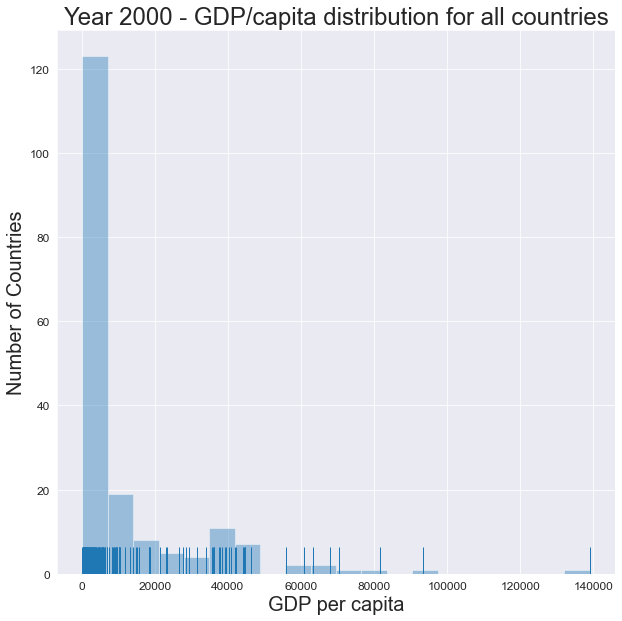

In [26]:
plt.figure(figsize=(10,10))
sns.distplot(gdps2000, bins=20, kde=False, rug=True);

plt.xlabel('GDP per capita', fontsize=20)
plt.title('Year 2000 - GDP/capita distribution for all countries', fontsize=24)
plt.ylabel('Number of Countries', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

The visualization indicates that a majority of countries have a GDP/capita < 20000.  The outliers, GDP/capita > 80000, are Monaco, Luxembuorg, & Norway, all of whom are Western European.

# Determine fastest growing countries of the world
## Calculate & Add the Compound Annual Growth Rate (CAGR) column

In [27]:
# calculate exponent value to add to calc_CAGR. 1/x where x = the number of years to calculate
# 2000-2018 = 19 years
1/19

0.05263157894736842

In [28]:
# define function that returns the CAGR when called

def calc_CAGR(row):
    return ((((row['2018'] / row['2001']) ** 0.052632) - 1) * 100)

In [29]:
# apply function to every row in the dataset & check results

gdp20up3['CAGR'] = gdp20up3.apply(lambda row: calc_CAGR(row),axis=1)
gdp20up3.head(3)

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2015,2016,2017,2018,four_regions,eight_regions,six_regions,World bank region,2017 income groups,CAGR
0,Afghanistan,330,330,330,343,333,357,365,406,412,...,574,571,572,564,asia,asia_west,south_asia,South Asia,Low income,2.861036
1,Albania,2240,2450,2570,2730,2890,3060,3260,3490,3780,...,4520,4680,4870,5080,europe,europe_east,europe_central_asia,Europe & Central Asia,Upper middle income,3.912652
2,Algeria,3560,3620,3770,3990,4110,4290,4300,4380,4410,...,4780,4830,4790,4760,africa,africa_north,middle_east_north_africa,Middle East & North Africa,Upper middle income,1.451357


In [30]:
# Sort dataframe by Compound Annual Growth Rate (CAGR), greatest to least
gdp20up3.sort_values('CAGR',axis=0, ascending=False,inplace=True,na_position='last')

#gdp5.iloc[0:15,-12:]
#gdp5.iloc[0:15,columns_to_show]

In [31]:
gdp20up3.head(10)

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2015,2016,2017,2018,four_regions,eight_regions,six_regions,World bank region,2017 income groups,CAGR
116,Myanmar,342,377,418,471,531,598,671,747,819,...,1340,1400,1490,1570,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific,Lower middle income,7.797476
35,China,1770,1900,2060,2250,2470,2730,3060,3480,3800,...,6480,6880,7310,7750,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific,Upper middle income,7.679832
10,Azerbaijan,1660,1810,1960,2150,2330,2950,3920,4860,5270,...,6060,5810,5740,5770,europe,europe_east,europe_central_asia,Europe & Central Asia,Upper middle income,6.291875
175,Turkmenistan,2380,2460,2440,2500,2590,2900,3180,3490,3950,...,6690,6990,7320,7650,asia,asia_west,europe_central_asia,Europe & Central Asia,Upper middle income,6.153220
7,Armenia,1400,1550,1760,2020,2240,2570,2930,3370,3630,...,3920,3920,4200,4410,europe,europe_east,europe_central_asia,Europe & Central Asia,Lower middle income,5.657554
56,Ethiopia,197,208,205,195,215,234,252,273,295,...,483,514,548,570,africa,africa_sub_saharan,sub_saharan_africa,Sub-Saharan Africa,Low income,5.449105
62,Georgia,1630,1740,1850,2070,2200,2430,2670,3030,3110,...,4180,4300,4510,4730,europe,europe_east,europe_central_asia,Europe & Central Asia,Lower middle income,5.404391
28,Cambodia,431,454,475,507,550,613,669,726,764,...,1020,1080,1140,1210,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific,Lower middle income,5.294817
19,Bhutan,1120,1190,1290,1370,1420,1500,1590,1860,1930,...,2780,2970,3070,3130,asia,asia_west,south_asia,South Asia,Lower middle income,5.221697
112,Mongolia,1600,1630,1690,1790,1960,2080,2230,2420,2600,...,3900,3870,4000,4210,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific,Lower middle income,5.120969


In [32]:
# create dataframe of top 10 exclusively
CAGR_top10 = gdp20up3.head(10)

<a id='question_2'></a>
# #2: Which regions, as determined by the World Bank, contain the top 10 fastest growing countries according to GDP/capita CAGR, 2000-2018?

<a href="#top">Back to top</a>

In [33]:
gdp20up3.eight_regions.unique()

array(['east_asia_pacific', 'europe_east', 'asia_west',
       'africa_sub_saharan', 'america_north', 'america_south',
       'europe_west', 'africa_north'], dtype=object)

In [34]:
eight_regionsCAGR = CAGR_top10.groupby('eight_regions')['CAGR'].mean()
eight_regionsCAGR

eight_regions
africa_sub_saharan    5.449105
asia_west             5.687458
east_asia_pacific     6.473274
europe_east           5.784607
Name: CAGR, dtype: float64

In [35]:
other2 = pd.Series([0,0,0,0], index=['america_north','america_south','europe_west','africa_north'], name='Other Regions')

In [36]:
other2

america_north    0
america_south    0
europe_west      0
africa_north     0
Name: Other Regions, dtype: int64

In [37]:
top10_CAGR = eight_regionsCAGR.append(other2)
top10_CAGR

africa_sub_saharan    5.449105
asia_west             5.687458
east_asia_pacific     6.473274
europe_east           5.784607
america_north         0.000000
america_south         0.000000
europe_west           0.000000
africa_north          0.000000
dtype: float64

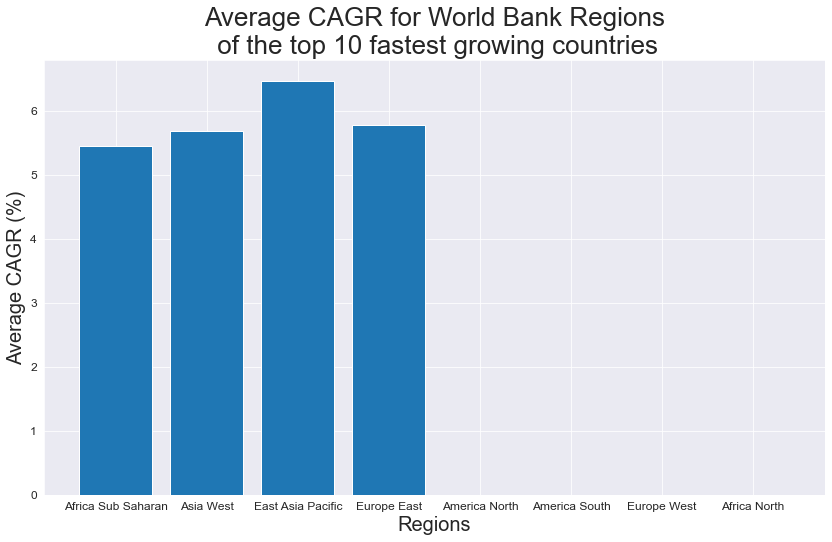

In [38]:
# Compare the 8 regions where the top 10 fastest growing economies fall within, averaged

locations = [1,2,3,4,5,6,7,8]
heights = top10_CAGR
plt.figure(figsize=(14,8))

# labels = ['African Sub Saharan','Asia West','East Asia Pacific','Europe East','America North','America South','Europe West','Africa North']
labels = top10_CAGR.index.str.replace('_',' ').str.title() # alternative to line above

#eight_regionsCAGR.plt(kind='bar',tick_label=labels)
plt.bar(locations, heights, tick_label=labels)

plt.title('Average CAGR for World Bank Regions\n of the top 10 fastest growing countries', fontsize=26)
plt.xlabel('Regions', fontsize=20)
plt.ylabel('Average CAGR (%)', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

The coutries with the greatest annulaized GPP/capita from 2000-2018 are categorized as Sub Saharan African, Western Asian, Eastern Pacific Asian, & East European. Eastern Pacific Asian has the greatest average CAGR.

<a id='question_3'></a>
# #3. Which income groups are represented, as determined by the World Bank, by the top 10 fastest growing countries?

<a href="#top">Back to top</a>

In [39]:
CAGR_top10

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2015,2016,2017,2018,four_regions,eight_regions,six_regions,World bank region,2017 income groups,CAGR
116,Myanmar,342,377,418,471,531,598,671,747,819,...,1340,1400,1490,1570,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific,Lower middle income,7.797476
35,China,1770,1900,2060,2250,2470,2730,3060,3480,3800,...,6480,6880,7310,7750,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific,Upper middle income,7.679832
10,Azerbaijan,1660,1810,1960,2150,2330,2950,3920,4860,5270,...,6060,5810,5740,5770,europe,europe_east,europe_central_asia,Europe & Central Asia,Upper middle income,6.291875
175,Turkmenistan,2380,2460,2440,2500,2590,2900,3180,3490,3950,...,6690,6990,7320,7650,asia,asia_west,europe_central_asia,Europe & Central Asia,Upper middle income,6.153220
7,Armenia,1400,1550,1760,2020,2240,2570,2930,3370,3630,...,3920,3920,4200,4410,europe,europe_east,europe_central_asia,Europe & Central Asia,Lower middle income,5.657554
56,Ethiopia,197,208,205,195,215,234,252,273,295,...,483,514,548,570,africa,africa_sub_saharan,sub_saharan_africa,Sub-Saharan Africa,Low income,5.449105
62,Georgia,1630,1740,1850,2070,2200,2430,2670,3030,3110,...,4180,4300,4510,4730,europe,europe_east,europe_central_asia,Europe & Central Asia,Lower middle income,5.404391
28,Cambodia,431,454,475,507,550,613,669,726,764,...,1020,1080,1140,1210,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific,Lower middle income,5.294817
19,Bhutan,1120,1190,1290,1370,1420,1500,1590,1860,1930,...,2780,2970,3070,3130,asia,asia_west,south_asia,South Asia,Lower middle income,5.221697
112,Mongolia,1600,1630,1690,1790,1960,2080,2230,2420,2600,...,3900,3870,4000,4210,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific,Lower middle income,5.120969


In [40]:
income_groupsCAGR = CAGR_top10.groupby('2017 income groups')['CAGR'].mean()
income_groupsCAGR

2017 income groups
Low income             5.449105
Lower middle income    5.749484
Upper middle income    6.708309
Name: CAGR, dtype: float64

In [41]:
# get 2017 income group names
gdp20up3['2017 income groups'].unique()

array(['Lower middle income', 'Upper middle income', 'Low income',
       'High income'], dtype=object)

In [42]:
# add high income group to income group series
income_group = pd.Series([0],index=['high income'],name='income group')
income_group

high income    0
Name: income group, dtype: int64

In [43]:
income_groupsCAGR = income_groupsCAGR.append(income_group)
income_groupsCAGR

Low income             5.449105
Lower middle income    5.749484
Upper middle income    6.708309
high income            0.000000
dtype: float64

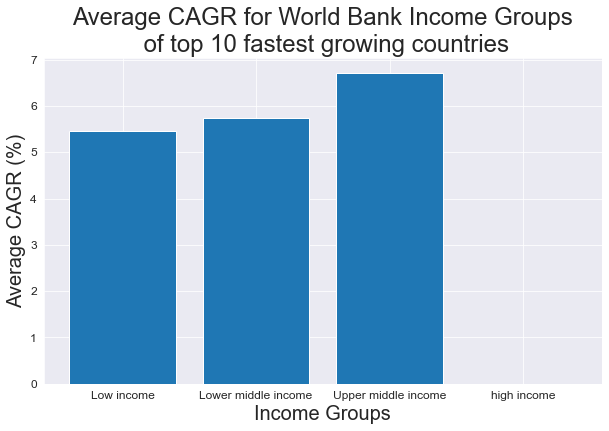

In [44]:
# Compare the 4 income groups where the top 10 fastest growing economies fall within, averaged

locations = [1,2,3,4]
heights = income_groupsCAGR
plt.figure(figsize=(10,6))

# labels = ['African Sub Saharan','Asia West','East Asia Pacific','Europe East','America North','America South','Europe West','Africa North']
#.str.replace('_',' ').str.title() # alternative to line above
labels = income_groupsCAGR.index


#eight_regionsCAGR.plt(kind='bar',tick_label=labels)
plt.bar(locations, heights, tick_label=labels)

plt.title('Average CAGR for World Bank Income Groups\n of top 10 fastest growing countries', fontsize=24)
plt.xlabel('Income Groups', fontsize=20)
plt.ylabel('Average CAGR (%)', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

The coutries with the greatest annulaized GPP/capita from 2000-2018 are categorized Low income, Lower Middle income, & Upper middle income. The upper middle income group has the greatest mean CAGR AND is Eastern Pacific Asian.

<a id='question_4'></a>
# #4 What did the GDP/capita trend look like for the top 10 countries?
To perform these plots, the dataframe will need to be transposed such that the years are in a column, and the countries are in a row.

<a href="#top">Back to top</a>

In [45]:
# Create copy of top 10 CAGR dataframe to restructure for line plot of GDPs
CAGR_top10re = CAGR_top10.copy()
CAGR_top10re.head(3)

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2015,2016,2017,2018,four_regions,eight_regions,six_regions,World bank region,2017 income groups,CAGR
116,Myanmar,342,377,418,471,531,598,671,747,819,...,1340,1400,1490,1570,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific,Lower middle income,7.797476
35,China,1770,1900,2060,2250,2470,2730,3060,3480,3800,...,6480,6880,7310,7750,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific,Upper middle income,7.679832
10,Azerbaijan,1660,1810,1960,2150,2330,2950,3920,4860,5270,...,6060,5810,5740,5770,europe,europe_east,europe_central_asia,Europe & Central Asia,Upper middle income,6.291875


In [46]:
# remove excess columns & check result
CAGR_top10re.drop(['four_regions','six_regions','eight_regions','World bank region','2017 income groups'], axis=1, inplace=True)
CAGR_top10re.head(3)

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,CAGR
116,Myanmar,342,377,418,471,531,598,671,747,819,...,979,1030,1090,1170,1260,1340,1400,1490,1570,7.797476
35,China,1770,1900,2060,2250,2470,2730,3060,3480,3800,...,4550,4960,5330,5710,6100,6480,6880,7310,7750,7.679832
10,Azerbaijan,1660,1810,1960,2150,2330,2950,3920,4860,5270,...,5840,5680,5720,5980,6070,6060,5810,5740,5770,6.291875


In [47]:
# Univariate Data Exploration:
# Explore the dispersion of the data
CAGR_top10re

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,CAGR
116,Myanmar,342,377,418,471,531,598,671,747,819,...,979,1030,1090,1170,1260,1340,1400,1490,1570,7.797476
35,China,1770,1900,2060,2250,2470,2730,3060,3480,3800,...,4550,4960,5330,5710,6100,6480,6880,7310,7750,7.679832
10,Azerbaijan,1660,1810,1960,2150,2330,2950,3920,4860,5270,...,5840,5680,5720,5980,6070,6060,5810,5740,5770,6.291875
175,Turkmenistan,2380,2460,2440,2500,2590,2900,3180,3490,3950,...,4440,5010,5460,5910,6400,6690,6990,7320,7650,6.153220
7,Armenia,1400,1550,1760,2020,2240,2570,2930,3370,3630,...,3220,3370,3600,3710,3820,3920,3920,4200,4410,5.657554
56,Ethiopia,197,208,205,195,215,234,252,273,295,...,342,369,390,419,449,483,514,548,570,5.449105
62,Georgia,1630,1740,1850,2070,2200,2430,2670,3030,3110,...,3230,3500,3750,3900,4070,4180,4300,4510,4730,5.404391
28,Cambodia,431,454,475,507,550,613,669,726,764,...,786,828,874,923,973,1020,1080,1140,1210,5.294817
19,Bhutan,1120,1190,1290,1370,1420,1500,1590,1860,1930,...,2260,2410,2500,2530,2640,2780,2970,3070,3130,5.221697
112,Mongolia,1600,1630,1690,1790,1960,2080,2230,2420,2600,...,2640,3040,3350,3670,3880,3900,3870,4000,4210,5.120969


In [48]:
# make copy before transposing, just in case
CAGR_top10re2 = CAGR_top10re.copy()

In [49]:
# perform the transpose
CAGR_top10re2 = CAGR_top10re2.transpose()
CAGR_top10re2.head(3)

,116,35,10,175,7,56,62,28,19,112
country,Myanmar,China,Azerbaijan,Turkmenistan,Armenia,Ethiopia,Georgia,Cambodia,Bhutan,Mongolia
2000,342,1770,1660,2380,1400,197,1630,431,1120,1600
2001,377,1900,1810,2460,1550,208,1740,454,1190,1630


In [50]:
# rename all column names with the first row of the dataframe with vectorizing

CAGR_top10re2.columns = CAGR_top10re2.iloc[0]

In [51]:
# the index needs fixing after transposing
CAGR_top10re2 = CAGR_top10re2.reset_index()
CAGR_top10re2.head(3)

country,index,Myanmar,China,Azerbaijan,Turkmenistan,Armenia,Ethiopia,Georgia,Cambodia,Bhutan,Mongolia
0,country,Myanmar,China,Azerbaijan,Turkmenistan,Armenia,Ethiopia,Georgia,Cambodia,Bhutan,Mongolia
1,2000,342,1770,1660,2380,1400,197,1630,431,1120,1600
2,2001,377,1900,1810,2460,1550,208,1740,454,1190,1630


In [52]:
# remove CAGR & country row and check result
# rename "index" column to "year"
CAGR_top10re2.drop(0,inplace=True)
CAGR_top10re2.drop(20,inplace=True)
CAGR_top10re2 = CAGR_top10re2.rename(columns={'index':'year'})
CAGR_top10re2.head(3)

country,year,Myanmar,China,Azerbaijan,Turkmenistan,Armenia,Ethiopia,Georgia,Cambodia,Bhutan,Mongolia
1,2000,342,1770,1660,2380,1400,197,1630,431,1120,1600
2,2001,377,1900,1810,2460,1550,208,1740,454,1190,1630
3,2002,418,2060,1960,2440,1760,205,1850,475,1290,1690


In [53]:
# rename "index" column to "year"
CAGR_top10re2 = CAGR_top10re2.rename(columns={'index':'year'})
CAGR_top10re2.head(3)

country,year,Myanmar,China,Azerbaijan,Turkmenistan,Armenia,Ethiopia,Georgia,Cambodia,Bhutan,Mongolia
1,2000,342,1770,1660,2380,1400,197,1630,431,1120,1600
2,2001,377,1900,1810,2460,1550,208,1740,454,1190,1630
3,2002,418,2060,1960,2440,1760,205,1850,475,1290,1690


## Create line plot of the Top 5 fastest growing countries from 2000 - 2018

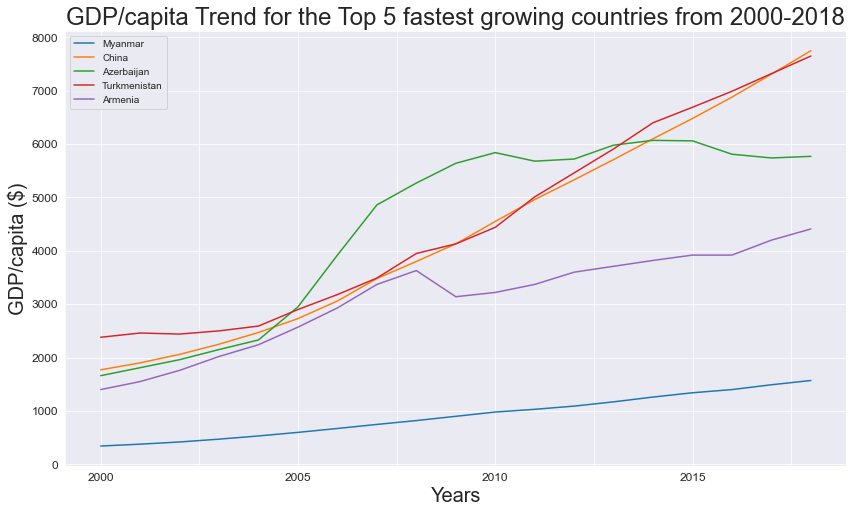

In [54]:
ax = plt.gca()

CAGR_top10re2.plot(x='year', y='Myanmar', kind='line', figsize=(14,8), ax=ax)
CAGR_top10re2.plot(x='year', y='China', kind='line', figsize=(14,8), ax=ax)
CAGR_top10re2.plot(x='year', y='Azerbaijan', kind='line', figsize=(14,8), ax=ax)
CAGR_top10re2.plot(x='year', y='Turkmenistan', kind='line', figsize=(14,8), ax=ax)
CAGR_top10re2.plot(x='year', y='Armenia', kind='line', figsize=(14,8), ax=ax)

plt.title("GDP/capita Trend for the Top 5 fastest growing countries from 2000-2018", fontsize=24)
plt.ylabel("GDP/capita ($)", fontsize=20)
plt.xlabel("Years", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

The line chart shows the degree of which the top 5 fastest growing countries grew. One can see that Armenia & Azerbaijan was affected by the global financial crisis, of 2007-2008, caused by the greed of the wealthy. One can see that Myanmar, China, & Turkmenistan were relatively unscathed by the global crisis.

## Create line plot of the Top 6-10 fastest growing countries from 2000 - 2018

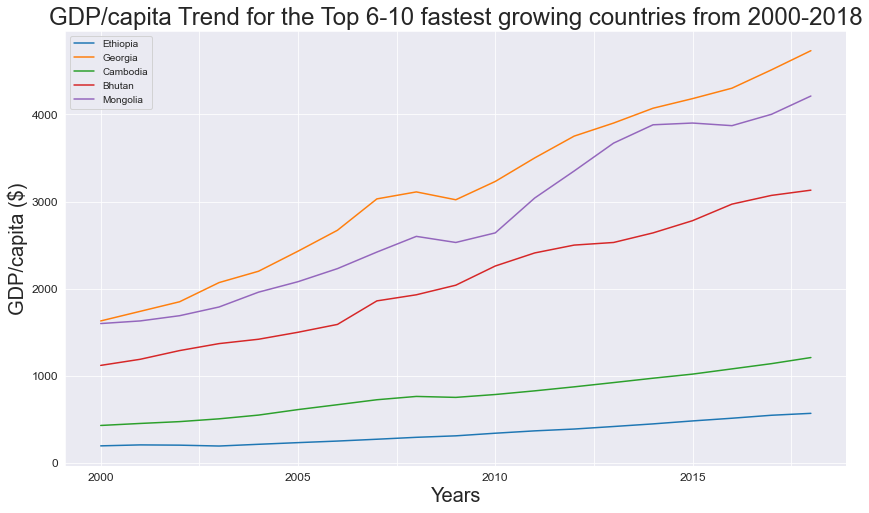

In [55]:
ax = plt.gca()

CAGR_top10re2.plot(x='year', y='Ethiopia', kind='line', figsize=(14,8), ax=ax)
CAGR_top10re2.plot(x='year', y='Georgia', kind='line', figsize=(14,8), ax=ax)
CAGR_top10re2.plot(x='year', y='Cambodia', kind='line', figsize=(14,8), ax=ax)
CAGR_top10re2.plot(x='year', y='Bhutan', kind='line', figsize=(14,8), ax=ax)
CAGR_top10re2.plot(x='year', y='Mongolia', kind='line', figsize=(14,8), ax=ax)

plt.title("GDP/capita Trend for the Top 6-10 fastest growing countries from 2000-2018", fontsize=24)
plt.ylabel("GDP/capita ($)", fontsize=20)
plt.xlabel("Years", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

The line chart shows the degree of which the top 6-10 fastest growing countries grew. One can see how most of these countries were affected by the global financial crisis. 

## See Investigate_a_Dataset_pg.2 Notebook for remainder of analysis

<a id='conclusions'></a>
# Conclusions

**1. How does the world's countries GDP/capita compare with one another?**
Visualization: Year 2000 - GDP/capita distribution for all countries. The visualization indicates that a majority of the countries have a low GDP/capita.

**2. Which regions, as determined by the World Bank, contain the top 10 fastest growing countries?**
Visualization: Average CAGR for World Bank Regions of the top 10 fastest growing countries. The visualization indicates that the fastest growing countries are Asian, Subsuharan African & East European.  

**3. Which income groups are represented, as determined by the World Bank, by the top 10 fastest growing countries (highest CAGR values)?**
Visualization: Average CAGR for World Bank Income Groups of top 10 fastest growing countries. The visualization shows that the greatest CAGR percentage countries are members of the World bank Income Groups- Low, Low Middle, & Upper Middle, thankfully.

**4. What did the GDP/capita trend look like for the top 10 countries?**
Visualizations: GPD/capita Trends for the top 10 fastest growing countries. China, Turkmenistan, & Ethiopia were not phased by the 2007-2008 global economic crisis. It also indicates, obviously, the slope of each countries growth.

<a href="#top">Back to top</a>

# Limitations

There is no data to correlate the global financial crisis with the line plots that show a visible change in trend. 